In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

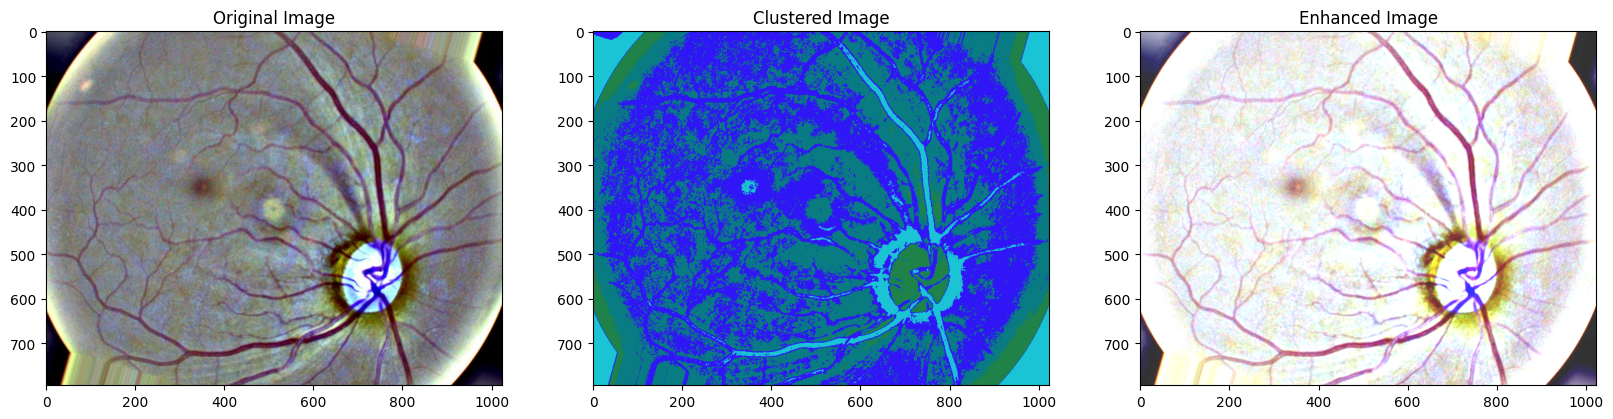

In [7]:
# Load and preprocess the image
image_path = 'DR1.jpeg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Flatten the image for clustering
pixels = image_rgb.reshape(-1, 3)

# Perform k-means clustering
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(pixels)
clusters = kmeans.labels_.reshape(image_rgb.shape[:2])
cluster_centers = kmeans.cluster_centers_.astype(np.uint8)

# Identify significant clusters (e.g., high intensity, large size)
significant_clusters = []

for cluster_id in range(num_clusters):
    mask = (clusters == cluster_id).astype(np.uint8)
    intensity = np.mean(image_gray[clusters == cluster_id])
    size = np.sum(mask)
    if intensity > 150 or size > 5000:  # Adjust thresholds as needed
        significant_clusters.append(cluster_id)

# Create an enhanced image by modifying key clusters
enhanced_image = image_rgb.copy()

for cluster_id in significant_clusters:
    # Create mask for the current cluster
    mask = (clusters == cluster_id).astype(np.uint8)
    
    # Apply contrast and brightness adjustment
    cluster_region = enhanced_image[mask == 1]
    enhanced_cluster = cv2.convertScaleAbs(cluster_region, alpha=1.5, beta=50)
    enhanced_image[mask == 1] = enhanced_cluster

# Apply a pseudo-color map for better visualization
pseudo_colored = np.zeros_like(image_rgb)

for cluster_id in range(num_clusters):
    mask = (clusters == cluster_id).astype(np.uint8)
    color = (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255))
    pseudo_colored[mask == 1] = color

# Plot the results
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image_rgb)

plt.subplot(1, 3, 2)
plt.title("Clustered Image")
plt.imshow(pseudo_colored)

plt.subplot(1, 3, 3)
plt.title("Enhanced Image")
plt.imshow(enhanced_image)

plt.show()


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skfuzzy as fuzz

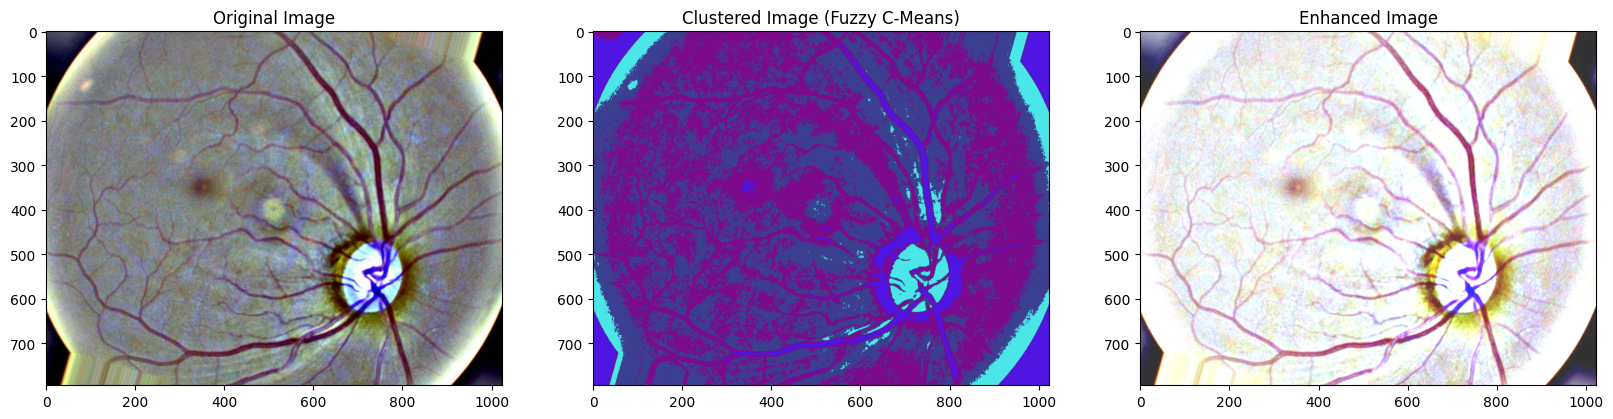

In [6]:
# Load and preprocess the image
image_path = 'DR1.jpeg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Flatten the image for clustering
pixels = image_rgb.reshape(-1, 3).astype(np.float32)

# Fuzzy C-Means clustering
num_clusters = 4
pixels_transposed = pixels.T  # Transpose for FCM input
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    pixels_transposed, num_clusters, 2, error=0.005, maxiter=1000, init=None
)

# Get the most likely cluster for each pixel
cluster_labels = np.argmax(u, axis=0).reshape(image_rgb.shape[:2])

# Identify significant clusters based on intensity and size
significant_clusters = []
for cluster_id in range(num_clusters):
    mask = (cluster_labels == cluster_id).astype(np.uint8)
    intensity = np.mean(image_gray[cluster_labels == cluster_id])
    size = np.sum(mask)
    if intensity > 150 or size > 5000:  # Adjust thresholds as needed
        significant_clusters.append(cluster_id)

# Create enhanced image
enhanced_image = image_rgb.copy()
for cluster_id in significant_clusters:
    # Create mask for the current cluster
    mask = (cluster_labels == cluster_id).astype(np.uint8)
    enhanced_cluster = cv2.convertScaleAbs(enhanced_image[mask == 1], alpha=1.5, beta=50)
    enhanced_image[mask == 1] = enhanced_cluster

# Apply pseudo-color mapping
pseudo_colored = np.zeros_like(image_rgb)
for cluster_id in range(num_clusters):
    mask = (cluster_labels == cluster_id).astype(np.uint8)
    color = (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255))
    pseudo_colored[mask == 1] = color

# Plot the results
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image_rgb)

plt.subplot(1, 3, 2)
plt.title("Clustered Image (Fuzzy C-Means)")
plt.imshow(pseudo_colored)

plt.subplot(1, 3, 3)
plt.title("Enhanced Image")
plt.imshow(enhanced_image)

plt.show()
